<h1 style="border: thick double #32a1ce; text-align:center;border-radius:35px">
Projet Python pour la data science: Analyse descriptive
</h1>

<h1 style="text-align: center"> 
Prérequis 
</h1>

In [144]:
# Librairies standards
import zipfile
import os
import io  
import numpy as np
import pandas as pd
import geopandas as gpd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

In [145]:
# Définition du répertoire de travail
HOME_DIR = Path.cwd().parent
DATA_DIR = Path(HOME_DIR, "data")
print(f"Work directory: {HOME_DIR} \nData directory: {DATA_DIR}")

Work directory: c:\Users\HP\Documents\Cours 2AD ENSAE\Semestre 1\Python pour data science\indice de l'air\projet-Python\projet 
Data directory: c:\Users\HP\Documents\Cours 2AD ENSAE\Semestre 1\Python pour data science\indice de l'air\projet-Python\projet\data


<h1 style=" text-align:center">
1.Description des données 
</h1>

<h2 style=" text-align:left">
1.1- Chargement et exploration des bases 
</h2>

Dans le cadre de notre travail nous allons utiliser 03 bases de données qui porte essentiellement sur: la qualité de l'air, les pathologie et les superficies dans la région Parisienne. 
   dans cette partie il est question de charger et/ou de visualiser nos  differentes  bases de données.

<h3 style=" text-align:left">
a. CHARGEMENT ET PREMIÈRE EXPLORATION DES DONNÉES (QUALITÉ DE L'AIR)
</h3>

**Présentation des variables de la base des indices de qualité de lair:**

Tout d'abord, nous tenons à souligner que nous nous sommes limités à 3 indicateurs de la qualité de l'air que sont le 'no2', le 'o3' et le 'pm10'.

In [146]:


# Lien direct vers le fichier CSV
url = "https://tabular-api.data.gouv.fr/api/resources/98e8387e-a53c-442d-bad3-141aed5d8a04/data/csv/"

# Envoyer une requête GET pour récupérer les données
response = requests.get(url, timeout=30)
response.raise_for_status()  # Lever une exception si la requête échoue

# Charger les données directement dans un DataFrame
qualite_air = pd.read_csv(io.StringIO(response.text))

# Afficher un aperçu du DataFrame
qualite_air.head()


,__id,date,ninsee,no2,o3,pm10
0,1,2017-01-01,0,23,16,43
1,2,2017-01-01,75,23,8,38
2,3,2017-01-01,77,19,17,44
3,4,2017-01-01,78,16,15,32
4,5,2017-01-01,91,14,16,34


In [147]:
qualite_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476494 entries, 0 to 476493
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   __id    476494 non-null  object
 1   date    476494 non-null  object
 2   ninsee  476494 non-null  object
 3   no2     476494 non-null  object
 4   o3      476494 non-null  object
 5   pm10    476494 non-null  object
dtypes: object(6)
memory usage: 21.8+ MB


In [148]:
# Supprimer la colonne '_id'
qualite_air = qualite_air.drop(columns=['__id'])


In [149]:
# Liste des variables numériques à convertir
var_norm = ['no2', 'o3', 'pm10']

# Convertir les colonnes en type int, en gérant les erreurs et les valeurs manquantes
for col in var_norm:
    try:
        qualite_air[col] = pd.to_numeric(qualite_air[col], errors='coerce').astype('Int64')  # Type Int64 pour gérer NaN
    except KeyError:
        print(f"Colonne {col} introuvable dans le DataFrame.")

# Afficher les informations sur le DataFrame après conversion
qualite_air.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476494 entries, 0 to 476493
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    476494 non-null  object
 1   ninsee  476494 non-null  object
 2   no2     476485 non-null  Int64 
 3   o3      476485 non-null  Int64 
 4   pm10    476485 non-null  Int64 
dtypes: Int64(3), object(2)
memory usage: 19.5+ MB


Description : Notre  base ne contient aucune valeur manquante. 

Variables : 
<ul>
    <li> date : La date de mesure des indicateurs de qualité de l’air.</li>
    <li>ninsee: code postale des département de l'ile de France. Le code INSEE de la commune ou de l’arrondissement parisien.</li>
    <li>NO2 (dioxyde d’azote) : Mesuré en µg/m³, ce polluant provient principalement des émissions des véhicules et des processus industriels. Il est un indicateur important de la pollution de l’air en milieu urbain.</li>
    <li> O3 (ozone) : Mesuré en µg/m³, l’ozone troposphérique est un polluant secondaire formé par des réactions chimiques entre d’autres polluants (comme les NOx et les COV) sous l’effet de la lumière solaire. Il est souvent plus présent en été.</li>
    <li> PM10 (particules fines) : Mesuré en µg/m³, ce sont des particules en suspension dans l’air dont le diamètre est inférieur à 10 micromètres. Elles proviennent de diverses sources, y compris les émissions des véhicules, les industries, et les activités de construction.</li>
</ul>

Comparaison pratique :
1 µg est une quantité minuscule. C'est l'équivalent de la masse d'une particule de poussière.
Dans un mètre cube (environ la taille d'une cabine téléphonique ou d'un petit ascenseur), cela revient à une infime quantité presque imperceptible à l'œil nu.

Exemple concret d'analogie :
Imaginez que vous dissolvez un grain de sel de table (environ 58 mg) dans une piscine olympique (2,5 millions de litres). La concentration en sel serait proche de 23 µg/m³ dans l'eau.








**Distribution des indicateurs:**


Analyse de la variable quantitative : no2
count     476485.0
mean     18.016225
std       9.368416
min            1.0
25%           11.0
50%           15.0
75%           23.0
max           64.0
Name: no2, dtype: Float64


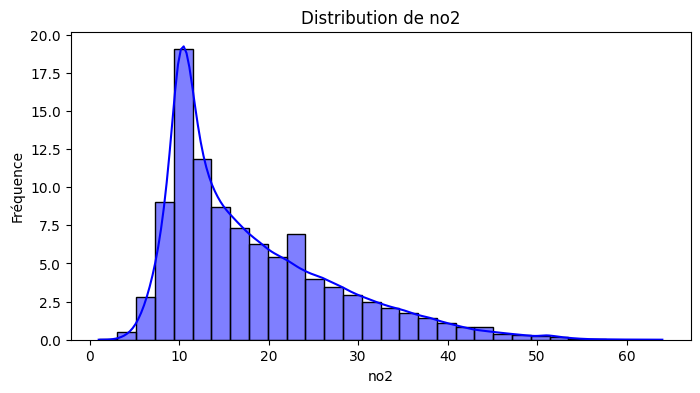


Analyse de la variable quantitative : o3
count     476485.0
mean     31.834522
std      10.959234
min            1.0
25%           25.0
50%           31.0
75%           38.0
max           97.0
Name: o3, dtype: Float64


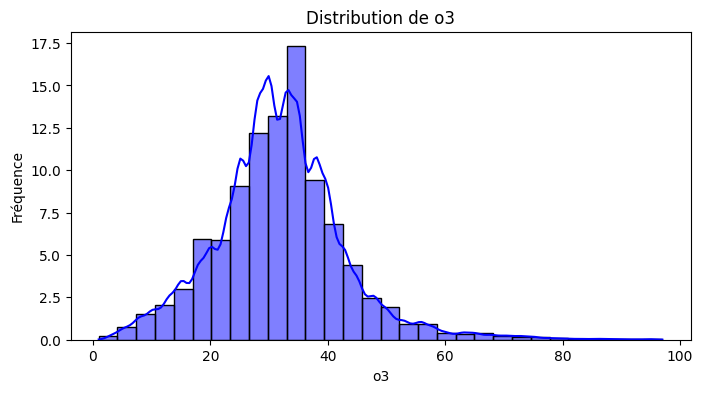


Analyse de la variable quantitative : pm10
count     476485.0
mean     26.724308
std      14.170604
min            2.0
25%           17.0
50%           24.0
75%           32.0
max           99.0
Name: pm10, dtype: Float64


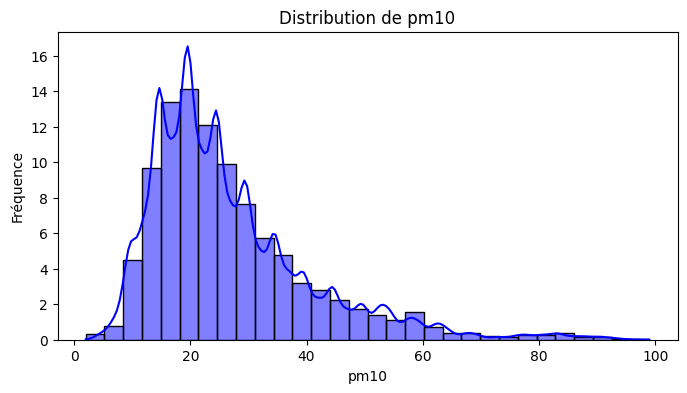

In [150]:
quantitative_vars = ['no2', 'o3', 'pm10']

for col in quantitative_vars:
    print(f"\nAnalyse de la variable quantitative : {col}")
    print(qualite_air[col].describe())
    
    # Histogramme
    plt.figure(figsize=(8, 4))
    sns.histplot(qualite_air[col], kde=True, bins=30, stat="percent", color='blue')
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()


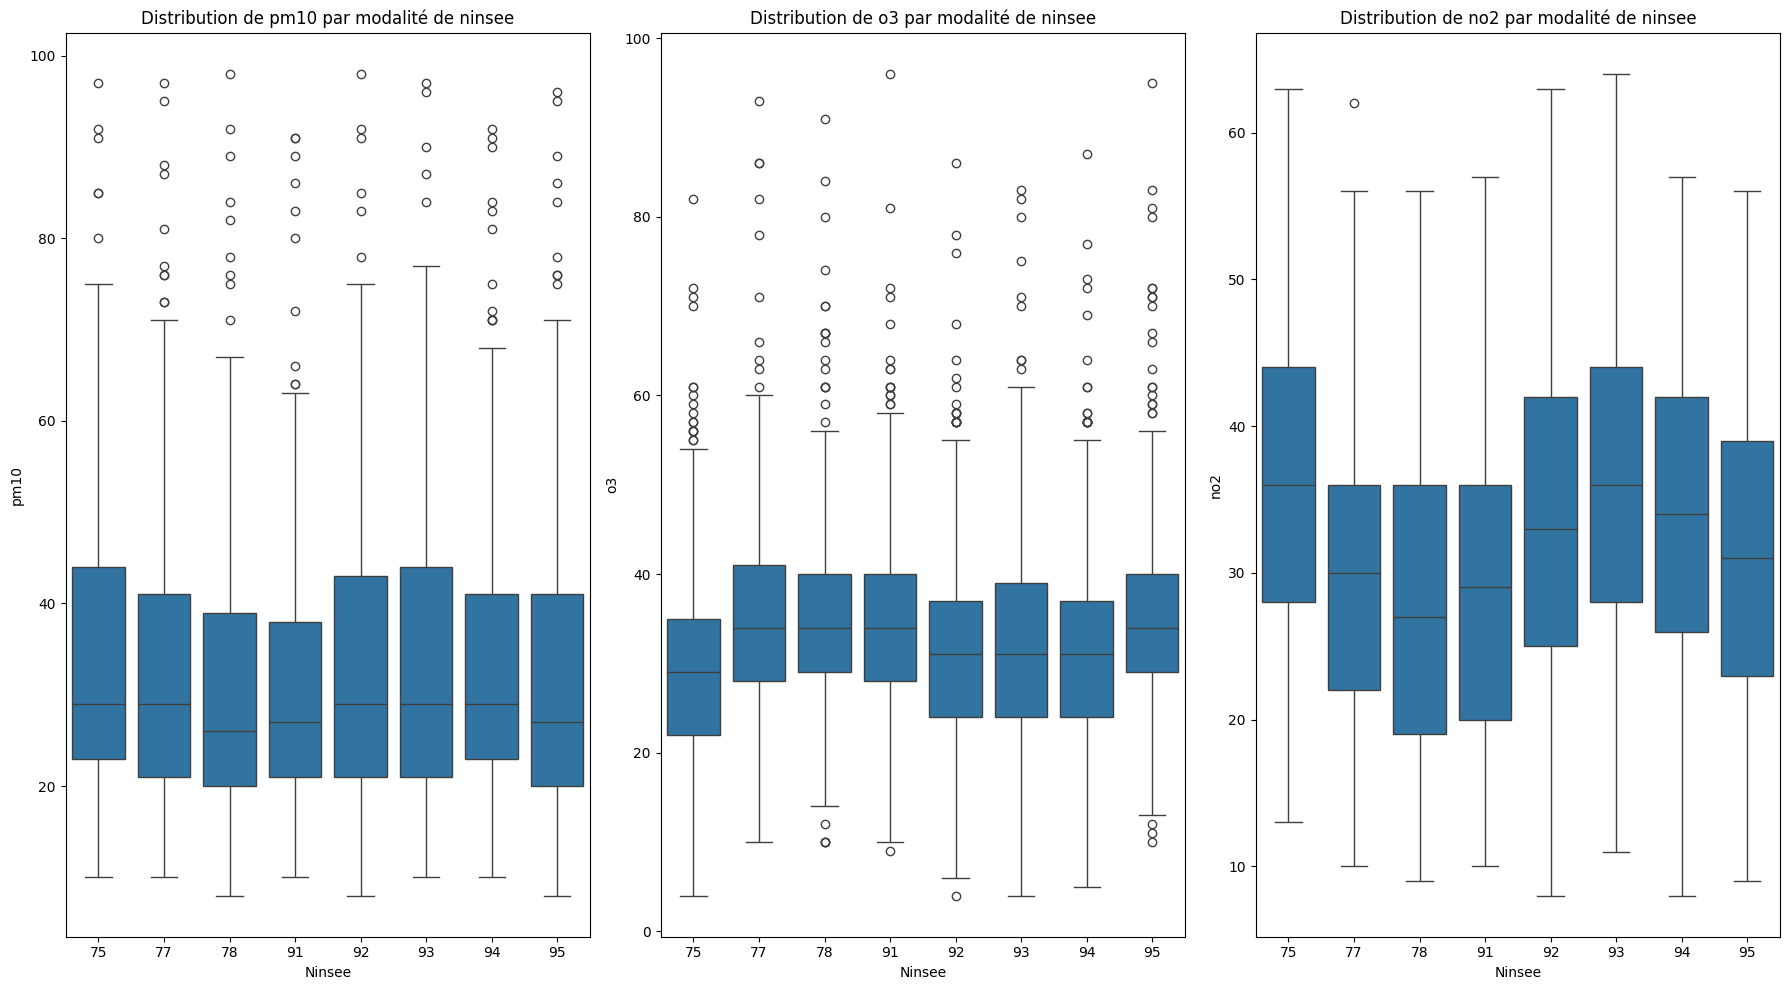

In [195]:
# Box-plot
idf_departments = ['75', '77', '78', '91', '92', '93', '94', '95']

# Filtrer les données par les codes INSEE des départements de l'Île-de-France
idf_data = qualite_air[qualite_air['ninsee'].isin(idf_departments)]

# Variables à analyser
variables = ['pm10', 'o3', 'no2']

# Définir la taille de la figure
plt.figure(figsize=(18, 10))

# Boucle pour créer un graphique pour chaque variable
for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)  # Placer les graphes sur une seule ligne (3 colonnes)
    
    # Boxplot pour chaque modalité de la variable 'ninsee'
    sns.boxplot(x='ninsee', y=var, data=idf_data)
    plt.title(f'Distribution de {var} par modalité de ninsee')
    plt.xlabel('Ninsee')
    plt.ylabel(var)

# Ajuster l'espacement des graphiques
plt.tight_layout()
plt.show()

La concentration en o3 est assez symétrique contrairement à no2 et pm10 qui présentent une asymétrie. Cela témoingne du fait que les faibles concentrations sont beaucoup plus représentées dans no2 et pm10. Comme nous souhaitons faire une fusion de bases de données, nous allons devoir résumer la base relative aux indices de l'air en données annuelles par département. Ces analyses univariées suggèrent  d'apporter certaines modifications aux variables pm10 et no2 afin de mieux savoir quelle statistique résumerait au mieux l'information dans ces variables.

**Distributions des variables catégorielles:**

In [152]:
# Pour chaque variable qualitative
qualitative_vars = ['date', 'ninsee']
for var in qualitative_vars:
    print(f"Résumé pour la variable '{var}':")
    freq_abs = qualite_air[var].value_counts()
    freq_rel = qualite_air[var].value_counts(normalize=True) * 100
    summary = pd.DataFrame({"Fréquence absolue": freq_abs, "Fréquence relative (%)": freq_rel})
    print(summary)
    print("\n")


Résumé pour la variable 'date':
            Fréquence absolue  Fréquence relative (%)
date                                                 
2017-01-01               1309                0.274715
2017-08-09               1309                0.274715
2017-06-09               1309                0.274715
2017-05-09               1309                0.274715
2017-04-09               1309                0.274715
...                       ...                     ...
2017-04-29               1309                0.274715
2017-04-28               1309                0.274715
2017-12-31               1309                0.274715
date                        9                0.001889
2017-09-27                  9                0.001889

[366 rows x 2 columns]


Résumé pour la variable 'ninsee':
        Fréquence absolue  Fréquence relative (%)
ninsee                                           
0                     365                0.076601
77                    365                0.076601
78    

In [153]:
#Nous allons présenter ces variables de façon agrégée

for col in qualitative_vars:
    print(f"\nAnalyse de la variable qualitative : {col}")
    
    # Nombre de valeurs uniques
    unique_count = qualite_air[col].nunique()
    print(f"Nombre de valeurs uniques : {unique_count}")
    
    # Valeur la plus fréquente et son nombre d'occurrences
    value_counts = qualite_air[col].value_counts()
    most_common_count = value_counts.max()  # Nombre maximal d'occurrences
    most_common_values = value_counts[value_counts == most_common_count]
    
    # Afficher la valeur la plus fréquente et son nombre d'occurrences
    print(f"Valeur(s) la/les plus fréquente(s) dans '{col}' avec {most_common_count} occurrences :")
    print(most_common_values.index.tolist())
    
    # Nombre de modalités ayant ce nombre maximal d'occurrences
    num_modalities = most_common_values.shape[0]
    print(f"Nombre de modalités avec ce nombre maximal d'occurrences : {num_modalities}")



Analyse de la variable qualitative : date
Nombre de valeurs uniques : 366
Valeur(s) la/les plus fréquente(s) dans 'date' avec 1309 occurrences :
['2017-01-01', '2017-08-09', '2017-06-09', '2017-05-09', '2017-04-09', '2017-03-09', '2017-02-09', '2017-01-09', '2017-08-31', '2017-08-30', '2017-08-29', '2017-08-28', '2017-08-27', '2017-08-26', '2017-08-25', '2017-08-24', '2017-08-23', '2017-08-22', '2017-08-21', '2017-08-20', '2017-08-19', '2017-07-09', '2017-09-09', '2017-08-17', '2017-10-09', '2017-09-30', '2017-09-29', '2017-09-28', '2017-09-26', '2017-09-25', '2017-09-24', '2017-09-23', '2017-09-22', '2017-09-21', '2017-09-20', '2017-09-19', '2017-09-18', '2017-09-17', '2017-09-16', '2017-09-15', '2017-09-14', '2017-09-13', '2017-12-09', '2017-11-09', '2017-08-18', '2017-08-16', '2017-02-01', '2017-07-24', '2017-07-22', '2017-07-21', '2017-07-20', '2017-07-19', '2017-07-18', '2017-07-17', '2017-07-16', '2017-07-15', '2017-07-14', '2017-07-13', '2017-12-07', '2017-11-07', '2017-10-07',

Ici est présenté le fait que les données sont collectées sur les 365 jours de l'année 2017 et pour chaque jour, chacun des 8 départements (Paris (75); Seine-et-Marne (77); Yvelines (78); Essonne (91); Hauts-de-Seine (92); Seine-Saint-Denis (93); Val-de-Marne (94); Val-d’Oise (95)) de la région parisienne (0) a une valeurs qui y est associée. Justifiant ainsi le fait que nous souhaitons "résumer" les informations de façon anuelle et par département. En ce qui concerne les valeurs désagrégées (par arrondissement), nous n'en n'auront pas besoin car notre étude se limite au niveau départemental.

<h3 style=" text-align:left">
b. CHARGEMENT ET FILTRAGE (PATHOLOGIES) 
</h3>

**Présentation de la base des pathologies:**

La base sur les pathologies respiratoires étant très volumineuse, nous avons dû la zipper pour la placer sur github. Nous allons donc la "dézipper" afin d'accéder aux données.

In [154]:
# Extraction du fichier zippé
import zipfile
from pathlib import Path

# Chemins
zip_path = Path(DATA_DIR, "effectifs (4).csv.zip")  # Fichier ZIP
extract_path = Path(DATA_DIR)  # Dossier où extraire les fichiers

# Nom du fichier à extraire depuis l'archive
file_to_extract = "effectifs (4).csv"

# Extraction
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extraire uniquement un fichier spécifique
    effectifs = zip_ref.extract(file_to_extract, extract_path)
    print(f"Fichier {file_to_extract} extrait avec succès dans {extract_path} !")



Fichier effectifs (4).csv extrait avec succès dans c:\Users\HP\Documents\Cours 2AD ENSAE\Semestre 1\Python pour data science\indice de l'air\projet-Python\projet\data !


In [155]:
pathologie = pd.read_csv(Path(DATA_DIR, "effectifs (4).csv"), sep=";")
pathologie.head(5)

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,region,dept,Ntop,Npop,prev,Niveau prioritaire,libelle_classe_age,libelle_sexe,tri
0,2017,Total consommants tous régimes,Total consommants tous régimes,Total consommants tous régimes,POP_TOT_IND,80-84,9,1,971,9520.0,9520,100.0,NaN,de 80 à 84 ans,tous sexes,NaN
1,2017,Total consommants tous régimes,Total consommants tous régimes,Total consommants tous régimes,POP_TOT_IND,80-84,9,2,999,10650.0,10650,100.0,NaN,de 80 à 84 ans,tous sexes,NaN
2,2017,Total consommants tous régimes,Total consommants tous régimes,Total consommants tous régimes,POP_TOT_IND,80-84,9,4,974,12430.0,12430,100.0,NaN,de 80 à 84 ans,tous sexes,NaN
3,2017,Total consommants tous régimes,Total consommants tous régimes,Total consommants tous régimes,POP_TOT_IND,80-84,9,4,999,12430.0,12430,100.0,NaN,de 80 à 84 ans,tous sexes,NaN
4,2017,Total consommants tous régimes,Total consommants tous régimes,Total consommants tous régimes,POP_TOT_IND,80-84,9,6,976,550.0,550,100.0,NaN,de 80 à 84 ans,tous sexes,NaN


In [156]:
pathologie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579600 entries, 0 to 579599
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   annee               579600 non-null  int64  
 1   patho_niv1          579600 non-null  object 
 2   patho_niv2          519120 non-null  object 
 3   patho_niv3          448560 non-null  object 
 4   top                 579600 non-null  object 
 5   cla_age_5           579600 non-null  object 
 6   sexe                579600 non-null  int64  
 7   region              579600 non-null  int64  
 8   dept                579600 non-null  object 
 9   Ntop                421380 non-null  float64
 10  Npop                579600 non-null  int64  
 11  prev                421380 non-null  float64
 12  Niveau prioritaire  572040 non-null  object 
 13  libelle_classe_age  579600 non-null  object 
 14  libelle_sexe        579600 non-null  object 
 15  tri                 572040 non-nul

Explication des variables:

- **annee** : L'année de collecte des données. (2017 ici)
- **patho_niv1** : Groupe de pathologies (ou traitements chroniques ou épisodes de soins). Type : texte. Exemple : Maladies du foie ou du pancréas (hors mucoviscidose).
- **patho_niv2** : Sous-groupe de pathologies (ou traitements chroniques ou épisodes de soins). Type : texte. Exemple : Maladies du foie ou du pancréas (hors mucoviscidose).
- **patho_niv3** : Sous-groupe détaillé de pathologies (ou traitements chroniques ou épisodes de soins). Type : texte. Exemple : Maladies du foie ou du pancréas (hors mucoviscidose).
- **top** : Libellé technique de la pathologie (ou traitement chronique ou épisode de soins). Type : texte. Exemple : MFP_CAT_EXC (Maladie fonctionnelle primaire, excès.).
- **cla_age_5** : Classe d’âge (5 ans). Type : texte. Exemple : 00-04.
- **sexe** : Sexe des patients. Type : texte. Exemple : 9.  _Attention: 9 signifie que la mesure n'a pa sété faite de façon désagrégé entre hommes et femmes, mais conjointement._
- **region** : Région de résidence des patients. Type : texte. Exemple : 32.
- **dept** : Département de résidence des patients. Type : texte. Exemple : 80. _Attention: 999 signifie que la mesure n'a pas été de faite de façon désagrégée par département, mais conjointement sur plusieurs départements._
- **Ntop** : Effectif de patients pris en charge pour la pathologie (ou traitement chronique ou épisode de soins) dont il est question. Type : int.
- **Npop** : Population de référence qui est celle de la cartographie des pathologies et des dépenses de l’Assurance Maladie, effectif de patients par pathologie, sexe, classe d'âge et territoire (département, région). Type : int. Exemple : 27700.
- **prev** : Prévalence de patients pris en charge pour la pathologie (ou traitement chronique ou épisode de soins) dont il est question. Type : décimal.
- **Niveau prioritaire** : Niveau de priorité attribué à la pathologie. Type : texte. Exemple : 1, 2, 3. _Lorsqu’une pathologie est associée à plusieurs niveaux de priorité (1, 2, 3), cela peut indiquer que la pathologie en question peut varier en gravité ou en urgence selon les cas individuels._
- **libelle_classe_age** : Libellé de la classe d’âge. Type : texte. Exemple : de 0 à 4 ans.
- **libelle_sexe** : Libellé du sexe. Type : texte. Exemple : tous sexes. _Note: “Tous sexes” signifie que les données incluent à la fois les hommes et les femmes, sans distinction_
- **tri** :  Aucune description disponible pour ce champ. (Variable utilisée pour le tri des données.)

Ces variables permettent de structurer et d'analyser les données sur les pathologies et les dépenses de l'Assurance Maladie. 

Cette base semble ne pas avoir de valeurs manquantes. Cependant elle en possède bel et bien. Ceux-ci sont par exemple codifiés par "9" (variable sexe) ou par "999" (vaiable départements). 

**Notre étude devant se faire sur la région parisienne, nous allons faire un filtre pour ne garder que les observations relatives à la région 11 = Île de France.**

In [157]:
# Filtrage: On ne garde que la région 11 (Ile-de-France)

#on filtre les données par region (on s'interessent a la region parisienne) .
filtred_by_rg=pathologie[pathologie['region']==11]
#on peut maintenant supprimer la colonne region
filtred_by_rg=filtred_by_rg.drop(columns = ['region'])
filtred_by_rg.head()

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,dept,Ntop,Npop,prev,Niveau prioritaire,libelle_classe_age,libelle_sexe,tri
5,2017,Total consommants tous régimes,Total consommants tous régimes,Total consommants tous régimes,POP_TOT_IND,80-84,9,75,49460.0,49460,100.0,NaN,de 80 à 84 ans,tous sexes,NaN
6,2017,Total consommants tous régimes,Total consommants tous régimes,Total consommants tous régimes,POP_TOT_IND,80-84,9,77,26320.0,26320,100.0,NaN,de 80 à 84 ans,tous sexes,NaN
7,2017,Total consommants tous régimes,Total consommants tous régimes,Total consommants tous régimes,POP_TOT_IND,80-84,9,92,34100.0,34100,100.0,NaN,de 80 à 84 ans,tous sexes,NaN
8,2017,Total consommants tous régimes,Total consommants tous régimes,Total consommants tous régimes,POP_TOT_IND,80-84,9,999,247850.0,247850,100.0,NaN,de 80 à 84 ans,tous sexes,NaN
51,2017,Total consommants tous régimes,Total consommants tous régimes,Total consommants tous régimes,POP_TOT_IND,85-89,1,94,7570.0,7570,100.0,NaN,de 85 à 89 ans,hommes,NaN


In [158]:
# voir le nombre de pathologie par niveau
print(f" patho_niv1: {filtred_by_rg["patho_niv1"].nunique()} \n patho_niv2: {filtred_by_rg["patho_niv2"].nunique()} \n patho_niv3: {filtred_by_rg["patho_niv3"].nunique()}")

 patho_niv1: 18 
 patho_niv2: 48 
 patho_niv3: 61


Au vu de la problématique que nous souhaitons aborder dans ce projet, nous n'allons nous restreindre qu'aux pathologies respiratoires sans toutefois s'intéresser à la spécificité de  la pathologie.

<h3 style=" text-align:left">
c . NETTOYAGE ET ANALYSE EXPLORATOIRE (PATHOLOGIES) 
</h3>

**Filtrage et exploration de la base des pathologies respiratoires:**

In [159]:
#Nous ne voulons garder que les maladies respiratoires qui sont en rapport avec la qualité de l'air
new_pathologie = filtred_by_rg[filtred_by_rg['patho_niv2'].isin(['Maladies respiratoires chroniques (hors mucoviscidose)',
        'Cancer bronchopulmonaire'])]

new_pathologie.head(2)

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,dept,Ntop,Npop,prev,Niveau prioritaire,libelle_classe_age,libelle_sexe,tri
13356,2017,Maladies respiratoires chroniques (hors mucovi...,Maladies respiratoires chroniques (hors mucovi...,Maladies respiratoires chroniques (hors mucovi...,RES_CAT_EXC,85-89,2,77,1550.0,11990,12.957,"1,2,3",de 85 à 89 ans,femmes,10.0
13357,2017,Maladies respiratoires chroniques (hors mucovi...,Maladies respiratoires chroniques (hors mucovi...,Maladies respiratoires chroniques (hors mucovi...,RES_CAT_EXC,85-89,2,91,1380.0,11890,11.572,"1,2,3",de 85 à 89 ans,femmes,10.0


In [160]:
new_pathologie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2268 entries, 13356 to 579572
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   annee               2268 non-null   int64  
 1   patho_niv1          2268 non-null   object 
 2   patho_niv2          2268 non-null   object 
 3   patho_niv3          1701 non-null   object 
 4   top                 2268 non-null   object 
 5   cla_age_5           2268 non-null   object 
 6   sexe                2268 non-null   int64  
 7   dept                2268 non-null   object 
 8   Ntop                1562 non-null   float64
 9   Npop                2268 non-null   int64  
 10  prev                1562 non-null   float64
 11  Niveau prioritaire  2268 non-null   object 
 12  libelle_classe_age  2268 non-null   object 
 13  libelle_sexe        2268 non-null   object 
 14  tri                 2268 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 283.5

Nous allons supprimer des variables:
- les redondantes: 'libelle_classe_age' et 'libelle_sexe '
- les non nécessaires pour notre problématique: 'annee', 'patho_niv1', 'patho_niv2', 'patho_niv3', 'top'

En effet, l'idée étant de calculer la probabilité de contracter une maladie respiratoire, nous n'allons pas faire de distinction dans les niveaux de pathologie, ni voir la maladie spécifique concernée.

In [161]:
# Suppression des variables redondantes ou non nécessaires 
columns_to_drop = ['annee', 'patho_niv1', 'patho_niv2', 'patho_niv3', 'libelle_classe_age', 'libelle_sexe', 'top']
new_pathologie = new_pathologie.drop(columns=columns_to_drop)


In [162]:
#Comptons le nombre de valeurs uniques de chaque variable afin de savoir s'il faut faire des conversions de type
new_pathologie.nunique()

cla_age_5               21
sexe                     3
dept                     9
Ntop                   460
Npop                   549
prev                  1106
Niveau prioritaire       3
tri                      4
dtype: int64

In [163]:
print(f"{pathologie['Niveau prioritaire'].unique()} \n {new_pathologie["Niveau prioritaire"].unique()} ")

[nan '1,2,3' '1' '2,3' '3' '2'] 
 ['1,2,3' '2' '3'] 


Nous remarquons déjà que la variable "Niveau prioritaire" est passée de 5 modalités à 3: les maladies respiratoires semblent donc ne jamais se limiter au niveau de priorité '1' ni être de niveau '2,3'. Donc, si une maladie respiratoire est cotractée, elle soit une maladie mutante (allant du niveau de priorité ou de gravité 1 à 3 en pasant par le niveau 2), soit une maladie figée directement de niveau de gravité moyen(2) ou de niveau de gravité extrême (3)

Nous allons donc changer le type des variables 'sexe' et 'tri'

In [164]:
#Changer le type de la variable sexe
new_pathologie['sexe'] = new_pathologie['sexe'].astype('object')

#Changer le type de la variable tri
new_pathologie['tri'] = new_pathologie['tri'].astype('object')

**Résumé descriptif des variables catégorielles:**

In [165]:
# Filtrer uniquement les variables catégorielles (type object)
categorical_vars = new_pathologie.select_dtypes(include='object')

# Résumé descriptif des variables catégorielles
for col in categorical_vars.columns:
    print(f"\nRésumé descriptif pour la variable '{col}':")
    print(f"- Nombre de valeurs uniques : {categorical_vars[col].nunique()}")
    
    # Calcul de la fréquence maximale et des modalités correspondantes
    value_counts = categorical_vars[col].value_counts()
    max_count = value_counts.max()
    top_modalities = value_counts[value_counts == max_count].index.tolist()
    
    print(f"- Nombre de modalités ayant la fréquence maximale ({max_count} occurrences) : {len(top_modalities)}")
    print(f"- Modalités ayant la fréquence maximale : {top_modalities}")



Résumé descriptif pour la variable 'cla_age_5':
- Nombre de valeurs uniques : 21
- Nombre de modalités ayant la fréquence maximale (108 occurrences) : 21
- Modalités ayant la fréquence maximale : ['85-89', '35-39', '75-79', '70-74', '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '30-34', '90-94', '25-29', '20-24', '15-19', '10-14', '05-09', '00-04', 'tsage', '95et+', '80-84']

Résumé descriptif pour la variable 'sexe':
- Nombre de valeurs uniques : 3
- Nombre de modalités ayant la fréquence maximale (756 occurrences) : 3
- Modalités ayant la fréquence maximale : [2, 9, 1]

Résumé descriptif pour la variable 'dept':
- Nombre de valeurs uniques : 9
- Nombre de modalités ayant la fréquence maximale (252 occurrences) : 9
- Modalités ayant la fréquence maximale : ['77', '91', '93', '78', '999', '75', '94', '95', '92']

Résumé descriptif pour la variable 'Niveau prioritaire':
- Nombre de valeurs uniques : 3
- Nombre de modalités ayant la fréquence maximale (1134 occurrences) : 1
- Mo

Les variables catégorielles semblent assez homogènes. Cependant, le niveau prioraitaire '3' est très représenté. Il semble que les individus qui contractent une maladie respectiratoire ont des hauts risque que ce soit une maladie très grave. 

In [166]:
# Test de Chi-2 : 'tri' et 'Niveau prioritaire'


from scipy.stats import chi2_contingency
# Créer un tableau de contingence entre 'tri' et 'Niveau prioritaire'
contingency_table = pd.crosstab(new_pathologie['tri'], new_pathologie['Niveau prioritaire'])

# Afficher le tableau de contingence
print("Tableau de contingence :")
print(contingency_table)

# Appliquer le test du chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats du test
print(f"\nChi2: {chi2}")
print(f"p-value: {p}")

# Interprétation des résultats
if p < 0.05:
    print("Il existe une relation significative entre 'tri' et 'Niveau prioritaire'.")
else:
    print("Il n'y a pas de relation significative entre 'tri' et 'Niveau prioritaire'.")

Tableau de contingence :
Niveau prioritaire  1,2,3    2    3
tri                                
10.0                  567    0    0
19.0                    0  567    0
58.0                    0    0  567
59.0                    0    0  567

Chi2: 4536.0
p-value: 0.0
Il existe une relation significative entre 'tri' et 'Niveau prioritaire'.


In [167]:
#on remarque une forte correlation entre tri et niveau prioritaire 
#on compare donc la distrubition 
print(new_pathologie[['tri', 'Niveau prioritaire']].drop_duplicates())

         tri Niveau prioritaire
13356   10.0              1,2,3
245627  19.0                  2
251462  58.0                  3
257301  59.0                  3


In [168]:
#niveau prioritaire est suffisant pour notre analyse 
#on supprime donc la colonne tri
new_data=new_pathologie.drop(columns =['tri'])
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2268 entries, 13356 to 579572
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cla_age_5           2268 non-null   object 
 1   sexe                2268 non-null   object 
 2   dept                2268 non-null   object 
 3   Ntop                1562 non-null   float64
 4   Npop                2268 non-null   int64  
 5   prev                1562 non-null   float64
 6   Niveau prioritaire  2268 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 141.8+ KB


**Résumé descriptif des variables continues**

In [169]:
new_pathologie.describe()

,Ntop,Npop,prev
count,1562.000000,2.268000e+03,1562.000000
mean,3163.271447,1.653528e+05,2.574609
std,19228.221844,6.389070e+05,3.839486
min,10.000000,5.500000e+02,0.002000
25%,70.000000,3.251000e+04,0.183000
50%,270.000000,4.705000e+04,0.514000
75%,1860.000000,8.944000e+04,3.505000
max,574020.000000,1.171935e+07,17.086000


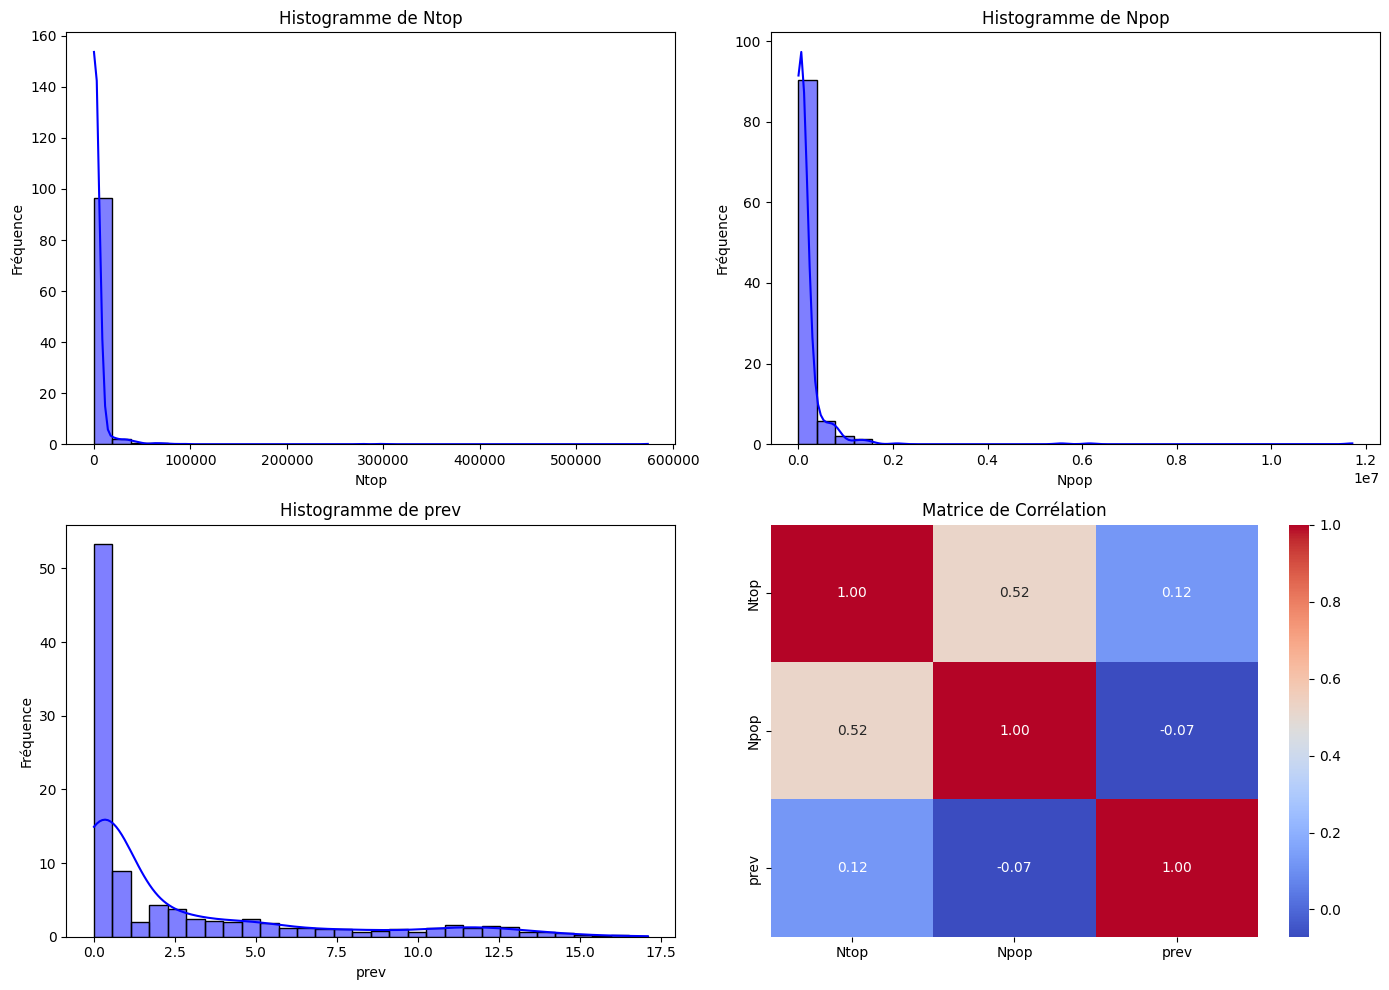

In [170]:
# Sélectionner les variables continues (float et int)
continuous_vars = new_pathologie.select_dtypes(include=['float64', 'int64']).columns

# Définir la taille de la figure globale
plt.figure(figsize=(14, 10))

# Nombre total de graphiques (les variables continues + le graphe des corrélations)
total_plots = len(continuous_vars) + 1

# Boucle sur chaque variable continue
for i, col in enumerate(continuous_vars):
    # Position du graphique dans la grille (2 colonnes par ligne)
    plt.subplot((total_plots + 1) // 2, 2, i + 1) 
    
    # Affichage de l'histogramme avec une courbe de densité
    sns.histplot(new_pathologie[col], bins=30, kde=True, stat='percent', color='blue')
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")

# Ajouter le graphique des corrélations dans le dernier cadre
plt.subplot((total_plots + 1) // 2, 2, total_plots)
correlation_matrix = new_pathologie[continuous_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title("Matrice de Corrélation")

# Ajustement des espacements
plt.tight_layout()
plt.show()


Ces varibles sont assez dispersées et présentent une correlation linéaire très faible. 

Corrélation entre 'prev' et 'prop' : 0.9999438142652092


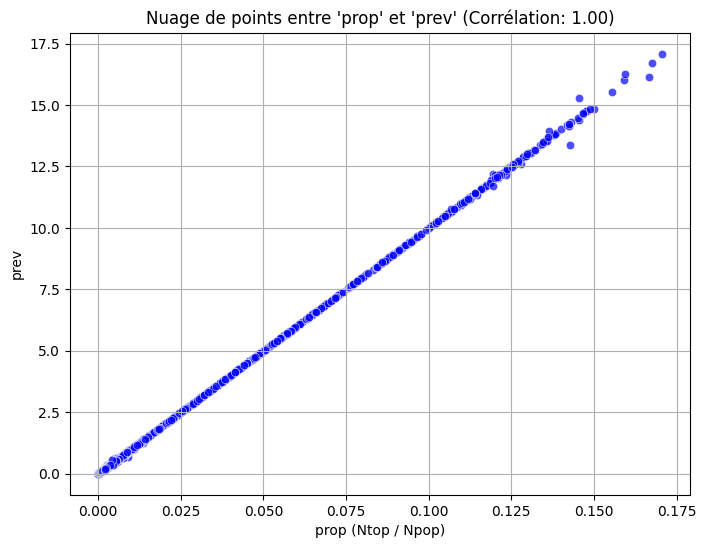

In [171]:
# Créer la variable 'prop' en divisant 'Ntop' par 'Npop'
new_pathologie['prop'] = new_pathologie['Ntop'] / new_pathologie['Npop']

# Calcul de la corrélation
correlation = new_pathologie[['prev', 'prop']].corr().iloc[0, 1]
print(f"Corrélation entre 'prev' et 'prop' : {correlation}")

# Visualisation de la relation entre 'prev' et 'prop'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_pathologie, x='prop', y='prev', color='blue', alpha=0.7)
plt.title(f"Nuage de points entre 'prop' et 'prev' (Corrélation: {correlation:.2f})")
plt.xlabel("prop (Ntop / Npop)")
plt.ylabel("prev")
plt.grid(True)
plt.show()


Nous voyons donc que nous avons la relation:
$$ prev = Ntop/Npop . $$
Dès lors, il nous suffira de garder 2 de ces variables (car on peut obtenir le dernier à partir des 2 autres). Nous conserverons prev et Npop.

In [172]:
# Calculer la proportion de valeurs manquantes pour chaque variable
missing_proportions = new_pathologie.isnull().mean() * 100

# Afficher les proportions dans un tableau lisible
missing_summary = pd.DataFrame({
    "Variable": missing_proportions.index,
    "Proportion de valeurs manquantes (%)": missing_proportions.values
}).sort_values(by="Proportion de valeurs manquantes (%)", ascending=False)

print(missing_summary)

print("\n nombre d'observation",new_pathologie.shape[0])


             Variable  Proportion de valeurs manquantes (%)
3                Ntop                             31.128748
5                prev                             31.128748
8                prop                             31.128748
0           cla_age_5                              0.000000
1                sexe                              0.000000
2                dept                              0.000000
4                Npop                              0.000000
6  Niveau prioritaire                              0.000000
7                 tri                              0.000000

 nombre d'observation 2268


Ainsi, sur 2268 observations de pathologies respiratoires dans la région parisienne, nous avons 31% de valeurs manquantes pour les variables 'Ntop' et 'prev'. Nous allons pousser les analyses pour voir comment corriger ces valeurs manquantes. 


<h3 style=" text-align:left">
d . NETTOYAGE ET ANALYSE EXPLORATOIRE (Superficie) 
</h3>

Nous allons juste prendre les variables superficie et département dans cette base

In [173]:


# Lien direct vers le fichier CSV
url = "https://www.data.gouv.fr/fr/datasets/r/9661724f-0d80-4bae-ad13-d5b8e1a11ac4"

# Envoyer une requête GET pour récupérer les données
response = requests.get(url, timeout=30)
response.raise_for_status()  # Lever une exception si la requête échoue

# Charger les données directement dans un DataFrame
Superficie_tot = pd.read_csv(io.StringIO(response.text))

# Afficher un aperçu du DataFrame
Superficie_tot.head()


,Unnamed: 0,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,...,altitude_minimale,altitude_maximale,latitude_mairie,longitude_mairie,latitude_centre,longitude_centre,grille_densite,gentile,url_wikipedia,url_villedereve
0,0,01001,L'Abergement-ClÃ©menciat,Abergement-ClÃ©menciat,Ã Abergement-ClÃ©menciat,de l'Abergement-ClÃ©menciat,l-abergement-clemenciat,L'ABERGEMENT-CLÃMENCIAT,COM,commune,...,206.0,272.0,46.153,4.926,46.153,4.926,Rural Ã habitat dispersÃ©,NaN,https://fr.wikipedia.org/wiki/fr:L'Abergement-...,https://villedereve.fr/ville/01001-l-abergemen...
1,1,01002,L'Abergement-de-Varey,Abergement-de-Varey,Ã Abergement-de-Varey,de l'Abergement-de-Varey,l-abergement-de-varey,L'ABERGEMENT-DE-VAREY,COM,commune,...,290.0,748.0,46.009,5.428,46.009,5.428,Rural Ã habitat dispersÃ©,"Abergementais, Abergementaises",https://fr.wikipedia.org/wiki/fr:L'Abergement-...,https://villedereve.fr/ville/01002-l-abergemen...
2,2,01004,AmbÃ©rieu-en-Bugey,AmbÃ©rieu-en-Bugey,Ã AmbÃ©rieu-en-Bugey,d'AmbÃ©rieu-en-Bugey,amberieu-en-bugey,AMBÃRIEU-EN-BUGEY,COM,commune,...,237.0,753.0,45.961,5.373,45.961,5.373,Centres urbains intermÃ©diaires,"Ambarrois, Ambarroises",https://fr.wikipedia.org/wiki/fr:AmbÃ©rieu-en-...,https://villedereve.fr/ville/01004-amberieu-en...
3,3,01005,AmbÃ©rieux-en-Dombes,AmbÃ©rieux-en-Dombes,Ã AmbÃ©rieux-en-Dombes,d'AmbÃ©rieux-en-Dombes,amberieux-en-dombes,AMBÃRIEUX-EN-DOMBES,COM,commune,...,265.0,302.0,45.996,4.912,45.996,4.912,Bourgs ruraux,Ambarrois,https://fr.wikipedia.org/wiki/fr:AmbÃ©rieux-en...,https://villedereve.fr/ville/01005-amberieux-e...
4,4,01006,AmblÃ©on,AmblÃ©on,Ã AmblÃ©on,d'AmblÃ©on,ambleon,AMBLÃON,COM,commune,...,330.0,940.0,45.750,5.594,45.750,5.594,Rural Ã habitat dispersÃ©,AmblÃ©onais,https://fr.wikipedia.org/wiki/fr:AmblÃ©on,https://villedereve.fr/ville/01006-ambleon


In [174]:
Superficie_tot.columns

Index(['Unnamed: 0', 'code_insee', 'nom_standard', 'nom_sans_pronom', 'nom_a',
       'nom_de', 'nom_sans_accent', 'nom_standard_majuscule', 'typecom',
       'typecom_texte', 'reg_code', 'reg_nom', 'dep_code', 'dep_nom',
       'canton_code', 'canton_nom', 'epci_code', 'epci_nom', 'academie_code',
       'academie_nom', 'code_postal', 'codes_postaux', 'zone_emploi',
       'code_insee_centre_zone_emploi', 'population', 'superficie_hectare',
       'superficie_km2', 'densite', 'altitude_moyenne', 'altitude_minimale',
       'altitude_maximale', 'latitude_mairie', 'longitude_mairie',
       'latitude_centre', 'longitude_centre', 'grille_densite', 'gentile',
       'url_wikipedia', 'url_villedereve'],
      dtype='object')

Nous avons une base qui renseigne les superficie des communes de toutes la France.

Par la suite nous allons nous restreindre aux communes de l'Iles de France afin de determiner la superficies des départements de l'iles de France

In [175]:
Superficie_tot['dep_code'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, 95, 971, 972, 973, 974, 976], dtype=object)

In [176]:

# Départements de la région parisienne (Île-de-France)
idf_departments = [75, 77, 78, 91, 92, 93, 94, 95]

# Filtrer les données par les codes INSEE des départements de l'Île-de-France
SUPerficie= Superficie_tot[Superficie_tot['dep_code'].isin(idf_departments)]

# Afficher les premières lignes des données filtrées
SUPerficie.head(7)


,Unnamed: 0,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,...,altitude_minimale,altitude_maximale,latitude_mairie,longitude_mairie,latitude_centre,longitude_centre,grille_densite,gentile,url_wikipedia,url_villedereve
29294,29294,75056,Paris,Paris,Ã Paris,de Paris,paris,PARIS,COM,commune,...,28.0,131.0,48.857,2.352,NaN,NaN,Grands centres urbains,Parisien,https://fr.wikipedia.org/wiki/fr:Paris,https://villedereve.fr/ville/75056-paris
29295,29295,75101,Paris 1er Arrondissement,Paris 1er Arrondissement,Ã Paris 1er Arrondissement,de Paris 1er Arrondissement,paris-1er-arrondissement,PARIS 1ER ARRONDISSEMENT,ARM,Arrondissement municipal,...,0.0,0.0,48.863,2.336,48.863,2.336,NaN,NaN,https://fr.wikipedia.org/wiki/fr:1er arrondiss...,https://villedereve.fr/ville/75101-paris-1er-a...
29296,29296,75102,Paris 2e Arrondissement,Paris 2e Arrondissement,Ã Paris 2e Arrondissement,de Paris 2e Arrondissement,paris-2e-arrondissement,PARIS 2E ARRONDISSEMENT,ARM,Arrondissement municipal,...,0.0,0.0,48.868,2.344,48.868,2.344,NaN,NaN,https://fr.wikipedia.org/wiki/fr:2e arrondisse...,https://villedereve.fr/ville/75102-paris-2e-ar...
29297,29297,75103,Paris 3e Arrondissement,Paris 3e Arrondissement,Ã Paris 3e Arrondissement,de Paris 3e Arrondissement,paris-3e-arrondissement,PARIS 3E ARRONDISSEMENT,ARM,Arrondissement municipal,...,0.0,0.0,48.863,2.359,48.863,2.359,NaN,NaN,https://fr.wikipedia.org/wiki/fr:3e arrondisse...,https://villedereve.fr/ville/75103-paris-3e-ar...
29298,29298,75104,Paris 4e Arrondissement,Paris 4e Arrondissement,Ã Paris 4e Arrondissement,de Paris 4e Arrondissement,paris-4e-arrondissement,PARIS 4E ARRONDISSEMENT,ARM,Arrondissement municipal,...,0.0,0.0,48.854,2.357,48.854,2.357,NaN,NaN,https://fr.wikipedia.org/wiki/fr:4e arrondisse...,https://villedereve.fr/ville/75104-paris-4e-ar...
29299,29299,75105,Paris 5e Arrondissement,Paris 5e Arrondissement,Ã Paris 5e Arrondissement,de Paris 5e Arrondissement,paris-5e-arrondissement,PARIS 5E ARRONDISSEMENT,ARM,Arrondissement municipal,...,0.0,0.0,48.844,2.350,48.844,2.350,NaN,NaN,https://fr.wikipedia.org/wiki/fr:5e arrondisse...,https://villedereve.fr/ville/75105-paris-5e-ar...
29300,29300,75106,Paris 6e Arrondissement,Paris 6e Arrondissement,Ã Paris 6e Arrondissement,de Paris 6e Arrondissement,paris-6e-arrondissement,PARIS 6E ARRONDISSEMENT,ARM,Arrondissement municipal,...,0.0,0.0,48.849,2.333,48.849,2.333,NaN,NaN,https://fr.wikipedia.org/wiki/fr:6e arrondisse...,https://villedereve.fr/ville/75106-paris-6e-ar...


In [177]:
superficie= SUPerficie[['dep_code', 'superficie_km2']]
superficie

,dep_code,superficie_km2
29294,75,105
29295,75,2
29296,75,1
29297,75,1
29298,75,2
...,...,...
34876,95,8
34877,95,10
34878,95,7
34879,95,3


Les superficies ayant été enregistrées par communes, nous les résumons donc par département pour notre travail.

In [178]:
# Résumer les données annuelles par département pour chaque variable
superficie_dept = superficie.groupby(['dep_code'])['superficie_km2'].agg(
    sup_dept_km2='sum'  # Somme des superficies des communes par département
).reset_index()

# Afficher les premières lignes du résumé
print(superficie_dept)

   dep_code  sup_dept_km2
0        75           211
1        77          5852
2        78          2291
3        91          1805
4        92           178
5        93           235
6        94           242
7        95          1250


In [179]:
superficie_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   dep_code      8 non-null      int64
 1   sup_dept_km2  8 non-null      int64
dtypes: int64(2)
memory usage: 260.0 bytes


Nous allons à présent faire une fusion de nos données afin de mieux continuer cette exploration très intéressante.

<h2 style=" text-align:left">
1.2- Fusion des bases de données 
</h2>

Récupérons préalablement la base de données agrégée des indices de l'air par département: elle a été crée grace au code contenu dans le fichier 'qualité_air(1).ipynb'

In [180]:
Qualite_aire = pd.read_csv(Path(DATA_DIR, "department_means.csv"), sep=",")
Qualite_aire.head(5)

,ninsee,pm10,o3,no2
0,75,29.0,29.652055,36.0
1,77,29.0,35.389041,30.0
2,78,26.0,35.106849,27.0
3,91,27.0,34.536986,29.0
4,92,29.0,31.043836,33.0


Rappellons tout d'abord que la la modalité "999" de la variable département n'est pas une valeur manquante, mais plutôt cette valeur représente le fait que les caractéristiques de la catégorie de pathologie consernée ont été répertoriées sans distinction de département; elle représentent les valeurs agrégées des observations par département. Il nous incombe alors de supprimer ces observations car elles ne sont pas pertinentes pour notre travail.

In [181]:
# Supprimer les lignes où la colonne "dept" est égale à 999
new_data = new_data[new_data["dept"] != "999"]
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2016 entries, 13356 to 579572
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cla_age_5           2016 non-null   object 
 1   sexe                2016 non-null   object 
 2   dept                2016 non-null   object 
 3   Ntop                1352 non-null   float64
 4   Npop                2016 non-null   int64  
 5   prev                1352 non-null   float64
 6   Niveau prioritaire  2016 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 126.0+ KB


In [182]:
#Vérifions les valeurs contenues dans les variables 'clées' suivant lesquelles se fera la fusion
print(f" {new_data["dept"].unique()} \n {Qualite_aire["ninsee"].unique()} \n {superficie_dept["dep_code"].unique()} ")

 ['77' '91' '93' '78' '75' '94' '95' '92'] 
 [75 77 78 91 92 93 94 95] 
 [75 77 78 91 92 93 94 95] 


In [183]:
# on change le nom de la colonne ninsee et de la colonne dep_code
Qualite_aire = Qualite_aire.rename(columns={'ninsee': 'dept'})
superficie_dept = superficie_dept.rename(columns={'dep_code': 'dept'})

# on convertie la colonne dept en str pour les deux autres data
Qualite_aire['dept'] = Qualite_aire['dept'].astype(str)
superficie_dept['dept'] = superficie_dept['dept'].astype(str)
print(f" {new_data["dept"].unique()} \n {Qualite_aire["dept"].unique()} \n {superficie_dept["dept"].unique()} ")

 ['77' '91' '93' '78' '75' '94' '95' '92'] 
 ['75' '77' '78' '91' '92' '93' '94' '95'] 
 ['75' '77' '78' '91' '92' '93' '94' '95'] 


In [184]:
# Joindre "new_data" et "Qualite_aire" sur la colonne "dept"
merged_data_1 = pd.merge(new_data, Qualite_aire, on="dept", how="left")

# Vérifier les premières lignes de la fusion
merged_data_1.head()


,cla_age_5,sexe,dept,Ntop,Npop,prev,Niveau prioritaire,pm10,o3,no2
0,85-89,2,77,1550.0,11990,12.957,"1,2,3",29.0,35.389041,30.0
1,85-89,2,91,1380.0,11890,11.572,"1,2,3",27.0,34.536986,29.0
2,85-89,2,93,1510.0,11760,12.874,"1,2,3",29.0,32.013699,36.0
3,85-89,9,77,2560.0,18490,13.863,"1,2,3",29.0,35.389041,30.0
4,85-89,9,78,2760.0,23040,11.992,"1,2,3",26.0,35.106849,27.0


In [185]:
# Joindre "merged_data_1" (résultat de la première fusion) et "superficie_dept" sur la colonne "dept"
principal_data = pd.merge(merged_data_1, superficie_dept, on="dept", how="left")

# Vérifier les premières lignes du résultat final
principal_data.head()


,cla_age_5,sexe,dept,Ntop,Npop,prev,Niveau prioritaire,pm10,o3,no2,sup_dept_km2
0,85-89,2,77,1550.0,11990,12.957,"1,2,3",29.0,35.389041,30.0,5852
1,85-89,2,91,1380.0,11890,11.572,"1,2,3",27.0,34.536986,29.0,1805
2,85-89,2,93,1510.0,11760,12.874,"1,2,3",29.0,32.013699,36.0,235
3,85-89,9,77,2560.0,18490,13.863,"1,2,3",29.0,35.389041,30.0,5852
4,85-89,9,78,2760.0,23040,11.992,"1,2,3",26.0,35.106849,27.0,2291


In [186]:
#Nous créons la variable densité pour voir la densité des individus considérés par km2 
principal_data["densite"] = principal_data["Npop"]/principal_data["sup_dept_km2"]
principal_data.head(3)

,cla_age_5,sexe,dept,Ntop,Npop,prev,Niveau prioritaire,pm10,o3,no2,sup_dept_km2,densite
0,85-89,2,77,1550.0,11990,12.957,"1,2,3",29.0,35.389041,30.0,5852,2.048872
1,85-89,2,91,1380.0,11890,11.572,"1,2,3",27.0,34.536986,29.0,1805,6.587258
2,85-89,2,93,1510.0,11760,12.874,"1,2,3",29.0,32.013699,36.0,235,50.042553


<h2 style=" text-align:left">
1.3- Analyse descriptive finale
</h2>

Nous allons actuellement faire une analyse de la base de données finale: principal_data .

D'après ce qui précède on sait que prev est calculé a partir de Npop et Ntop donc on peut suprrimer Ntop.
Nous supprimons aussi 'prop' car celle avait été calculée uniquement pour montrer la relation entre Ntop et Npop

In [187]:

Colunms_we_drop = ['Ntop', 'Npop', 'sup_dept_km2']
Principal_data1 = principal_data.drop(columns=Colunms_we_drop)
Principal_data1.head(7)

,cla_age_5,sexe,dept,prev,Niveau prioritaire,pm10,o3,no2,densite
0,85-89,2,77,12.957,"1,2,3",29.0,35.389041,30.0,2.048872
1,85-89,2,91,11.572,"1,2,3",27.0,34.536986,29.0,6.587258
2,85-89,2,93,12.874,"1,2,3",29.0,32.013699,36.0,50.042553
3,85-89,9,77,13.863,"1,2,3",29.0,35.389041,30.0,3.159604
4,85-89,9,78,11.992,"1,2,3",26.0,35.106849,27.0,10.056744
5,85-89,9,91,12.306,"1,2,3",27.0,34.536986,29.0,10.559557
6,90-94,1,75,13.046,"1,2,3",29.0,29.652055,36.0,29.289100


In [188]:
Principal_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cla_age_5           2016 non-null   object 
 1   sexe                2016 non-null   object 
 2   dept                2016 non-null   object 
 3   prev                1352 non-null   float64
 4   Niveau prioritaire  2016 non-null   object 
 5   pm10                2016 non-null   float64
 6   o3                  2016 non-null   float64
 7   no2                 2016 non-null   float64
 8   densite             2016 non-null   float64
dtypes: float64(5), object(4)
memory usage: 141.9+ KB


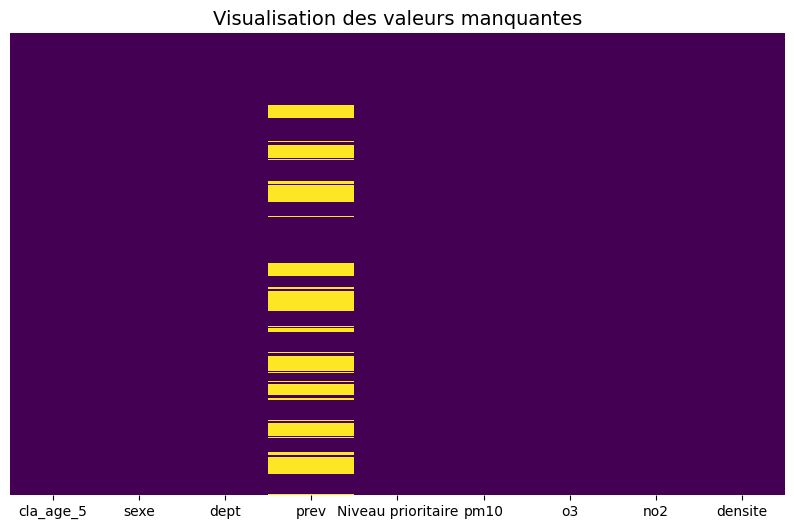

In [189]:

# Créer une matrice indiquant les valeurs manquantes (True pour manquant, False pour non manquant)
missing_matrix = Principal_data1.isnull()

# Visualiser les valeurs manquantes avec une heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_matrix, cmap="viridis", cbar=False, yticklabels=False)
plt.title("Visualisation des valeurs manquantes", fontsize=14)
plt.show()

La variable 'prev' est celle que nous cherchons à prédire. Dès lors, nous allons supprimer les observations dont la valeur 'prev' est manquante de sorte à ne considérer que les données existantes pour la modélisation.

In [190]:
#supprimer les lignes ou prev is nan 
Principal_data2=Principal_data1.dropna(subset=['prev'])
Principal_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1352 entries, 0 to 2008
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cla_age_5           1352 non-null   object 
 1   sexe                1352 non-null   object 
 2   dept                1352 non-null   object 
 3   prev                1352 non-null   float64
 4   Niveau prioritaire  1352 non-null   object 
 5   pm10                1352 non-null   float64
 6   o3                  1352 non-null   float64
 7   no2                 1352 non-null   float64
 8   densite             1352 non-null   float64
dtypes: float64(5), object(4)
memory usage: 105.6+ KB


In [191]:
# Vérifier les doublons basés sur toutes les colonnes
doublons = Principal_data2[Principal_data2.duplicated()]

# Compter le nombre de doublons
print(f"Nombre total de doublons  détectés : {len(doublons)}")


Nombre total de doublons  détectés : 1


In [192]:
# Supprimer les doublons dans le DataFrame
Principal_data2 = Principal_data2.drop_duplicates()

# Vérifier le nombre de doublons restant (devrait être 0)
print(f"Nombre de doublons après suppression : {Principal_data2.duplicated().sum()}")


Nombre de doublons après suppression : 0


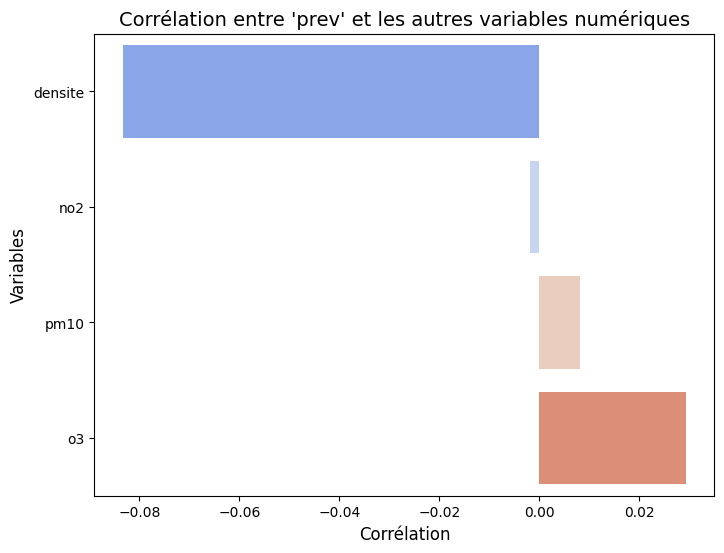

In [193]:
# Filtrer les colonnes numériques
numerical_cols = Principal_data2.select_dtypes(include=['float64']).columns

# Calcul de la corrélation entre la variable cible 'prev' et les autres variables numériques
correlation = Principal_data2[numerical_cols].corr()['prev'].drop('prev')  # Exclure 'prev' de la corrélation

# Trier les valeurs de corrélation pour une meilleure visualisation
correlation_sorted = correlation.sort_values(ascending=True)

# Tracer la corrélation de manière horizontale
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_sorted.values, y=correlation_sorted.index, palette='coolwarm')
plt.title("Corrélation entre 'prev' et les autres variables numériques", fontsize=14)
plt.xlabel("Corrélation", fontsize=12)
plt.ylabel("Variables", fontsize=12)
plt.show()

Ceci montre qu'il y a une très faible relation linéaire entre la prévalence et: la densité et la qualité de l'air. Nouys allons sauvegarder cette base finale et continuer le travail dans la partiemodélisation.

In [194]:
# Définir le répertoire de travail
HOME_DIR = Path.cwd().parent  # Le répertoire parent de l'endroit où le script est exécuté
DATA_DIR = Path(HOME_DIR, "data")  # Le chemin vers le dossier "data"
print(f"Work directory: {HOME_DIR} \nData directory: {DATA_DIR}")

# Vérifier si le dossier "data" existe
if not os.path.exists(DATA_DIR):
    raise FileNotFoundError(f"Le dossier {DATA_DIR} n'existe pas. Vérifiez son emplacement.")

# Enregistrer le DataFrame dans le dossier "data"
file_path = Path(DATA_DIR, "Principal_data.csv")
Principal_data2.to_csv(file_path, index=False)

print(f"Fichier sauvegardé avec succès dans {file_path}.")


Work directory: c:\Users\HP\Documents\Cours 2AD ENSAE\Semestre 1\Python pour data science\indice de l'air\projet-Python\projet 
Data directory: c:\Users\HP\Documents\Cours 2AD ENSAE\Semestre 1\Python pour data science\indice de l'air\projet-Python\projet\data
Fichier sauvegardé avec succès dans c:\Users\HP\Documents\Cours 2AD ENSAE\Semestre 1\Python pour data science\indice de l'air\projet-Python\projet\data\Principal_data.csv.


Avant de commencer toute modélisation, nous allons effectuer l’encodage des variables catégorielles, notamment la classe d’âge. Le sexe est déjà encodé de manière ordinale, mais nous devons nous assurer que l’ensemble des variables soit encodé de manière uniforme. L’encodage sera réalisé dans le fichier de modélisation.


**Nous ressortons ainsi la partie analyse exploratoire avec la base principale que nous utiliserons pour la modélisation.**